# Histogram-based Gradient Boosting Classification Tree

In [184]:
# Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.multioutput import MultiOutputClassifier 
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score

# Data
X_train_df = pd.read_csv('gold/X_train_df.csv', index_col='respondent_id') # training set features

training_set_labels_df = pd.read_csv('data/training_set_labels.csv', index_col='respondent_id') # training set labels

X_test_df = pd.read_csv('gold/X_test_df.csv', index_col='respondent_id') # test set features

submission_format_df = pd.read_csv('data/submission_format.csv', index_col='respondent_id') # submission format

In [185]:
X_train, X_test, y_train, y_test = train_test_split(X_train_df, training_set_labels_df, test_size=0.2, random_state=42, stratify=training_set_labels_df)

In [186]:
# Set up the MultiOutputClassifier with Random Forest Regressor
multi_output_clf = MultiOutputClassifier(HistGradientBoostingClassifier(random_state=42))

In [187]:
# # Let's do GridSearchCV
# # parameters grid
# param_grid = {
#     "estimator__learning_rate" : [0.05, 0.1, 0.2, 0.3],
#     "estimator__max_iter" : [100, 200, 300],
#     "estimator__max_leaf_nodes" : [31, 63, 127],
#     "estimator__max_depth" : [None, 5, 10, 20, 30],
#     "estimator__min_samples_leaf" : [20, 50, 100],
# }

In [188]:
# # Initialize Grid Search
# grid_search = GridSearchCV(estimator=multi_output_clf, param_grid=param_grid,
#                            cv=5, n_jobs=-1, verbose=2)

# # Fit the Grid Search model
# grid_search.fit(X_train, y_train)

# # Print the best parameters and best score
# print("Best Parameters from Grid Search:", grid_search.best_params_)
# print("Best Score from Grid Search:", grid_search.best_score_)

# # Evaluate on the test set
# y_pred_grid = grid_search.predict(X_test)
# mse_grid = mean_squared_error(y_test, y_pred_grid)
# acc_grid = accuracy_score(y_test, y_pred_grid)
# print(f"Mean Squared Error (Grid Search): {mse_grid}")
# print(f"Accuracy (Grid Search): {acc_grid}")

In [189]:
estimators = MultiOutputClassifier(
    estimator = HistGradientBoostingClassifier(
        learning_rate = 0.05, 
        max_depth = 5,
        max_iter = 200,
        max_leaf_nodes = 31,
        min_samples_leaf = 100
    )
)
# estimators = MultiOutputClassifier(estimator=HistGradientBoostingClassifier())

In [190]:
estimators.fit(X_train, y_train)

MultiOutputClassifier(estimator=HistGradientBoostingClassifier(learning_rate=0.05,
                                                               max_depth=5,
                                                               max_iter=200,
                                                               min_samples_leaf=100))

In [191]:
preds = estimators.predict_proba(X_test)
preds

[array([[0.97705866, 0.02294134],
        [0.22922517, 0.77077483],
        [0.95700666, 0.04299334],
        ...,
        [0.9520925 , 0.0479075 ],
        [0.73469904, 0.26530096],
        [0.42350704, 0.57649296]]),
 array([[0.6630573 , 0.3369427 ],
        [0.24750206, 0.75249794],
        [0.91145268, 0.08854732],
        ...,
        [0.89668305, 0.10331695],
        [0.38063284, 0.61936716],
        [0.36236717, 0.63763283]])]

In [192]:
y_preds = pd.DataFrame(
    {
        'h1n1_vaccine': preds[0][:,1],
        'seasonal_vaccine':preds[1][:,1],
    },
    index=y_test.index
)
print('y_preds.shape:', y_preds.shape)
y_preds.head()

y_preds.shape: (5342, 2)


,h1n1_vaccine,seasonal_vaccine
respondent_id,,
22317,0.022941,0.336943
1215,0.770775,0.752498
10540,0.042993,0.088547
7407,0.159062,0.265672
14697,0.066569,0.213636


In [193]:
def plot_roc(y_true, y_score, label_name, ax):
    fpr, tpr, thresholds = roc_curve(y_true, y_score)
    ax.plot(fpr, tpr)
    ax.plot([0,1], [0,1], color='red', linestyle='--')
    ax.set_ylabel('TPR')
    ax.set_xlabel('FPR')
    ax.set_title(
        f"{label_name}: AUC = {roc_auc_score(y_true, y_score):.4f}"
    )

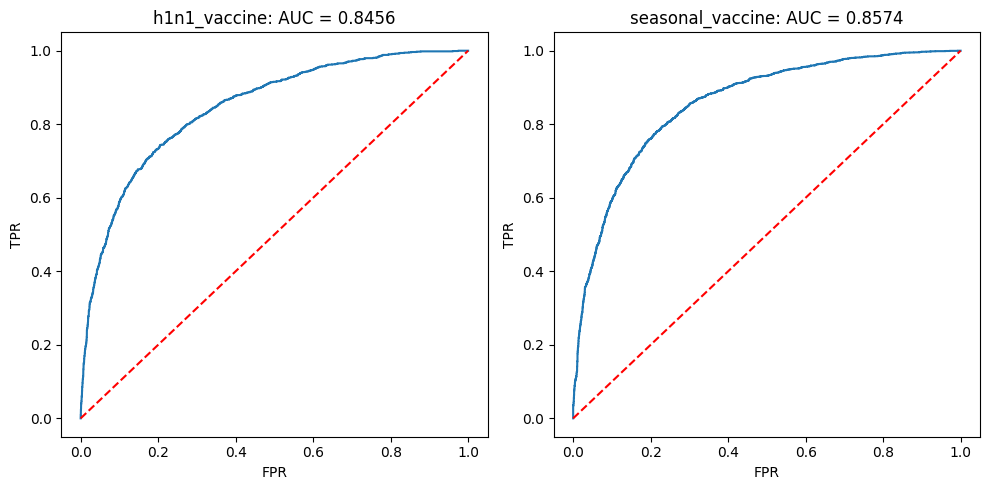

In [194]:
fig, ax = plt.subplots(1, 2, figsize=(10,5))

plot_roc(
    y_test['h1n1_vaccine'],
    y_preds['h1n1_vaccine'],
    'h1n1_vaccine',
    ax=ax[0])

plot_roc(
    y_test['seasonal_vaccine'],
    y_preds['seasonal_vaccine'],
    'seasonal_vaccine',
    ax=ax[1])

fig.tight_layout()

In [195]:
estimators.fit(X_train_df, training_set_labels_df)
preds = estimators.predict_proba(X_test_df)
preds

[array([[0.89842888, 0.10157112],
        [0.95060174, 0.04939826],
        [0.48449494, 0.51550506],
        ...,
        [0.88269341, 0.11730659],
        [0.95056277, 0.04943723],
        [0.47977192, 0.52022808]]),
 array([[0.78717357, 0.21282643],
        [0.95292782, 0.04707218],
        [0.18714698, 0.81285302],
        ...,
        [0.83978689, 0.16021311],
        [0.63568609, 0.36431391],
        [0.41141509, 0.58858491]])]

In [196]:
y_preds = pd.DataFrame(
    {
        'h1n1_vaccine': preds[0][:,1],
        'seasonal_vaccine':preds[1][:,1],
    },
    index=X_test_df.index
)
print('y_preds.shape:', y_preds.shape)
y_preds.head()

y_preds.shape: (26708, 2)


,h1n1_vaccine,seasonal_vaccine
respondent_id,,
26707,0.101571,0.212826
26708,0.049398,0.047072
26709,0.515505,0.812853
26710,0.681609,0.885684
26711,0.288419,0.520499


In [197]:
y_preds.to_csv('./results/pred_hist_gradient_boosting.csv', index = True)